In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [72]:
df = pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/candy_production.csv")
df.head()


,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [73]:
df["unique_id"]="1"
df.columns=["ds", "y", "unique_id"]
df.head()

,ds,y,unique_id
0,1972-01-01,85.6945,1
1,1972-02-01,71.8200,1
2,1972-03-01,66.0229,1
3,1972-04-01,64.5645,1
4,1972-05-01,65.0100,1


In [74]:
print(df.dtypes)

ds            object
y            float64
unique_id     object
dtype: object


In [75]:
df["ds"] = pd.to_datetime(df["ds"])

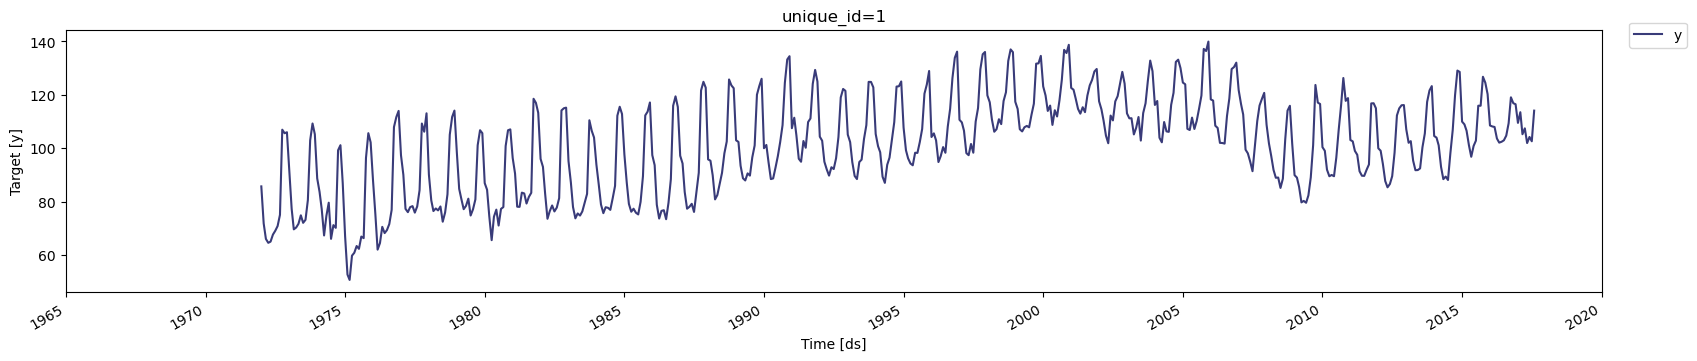

In [76]:
from statsforecast import StatsForecast

StatsForecast.plot(df)

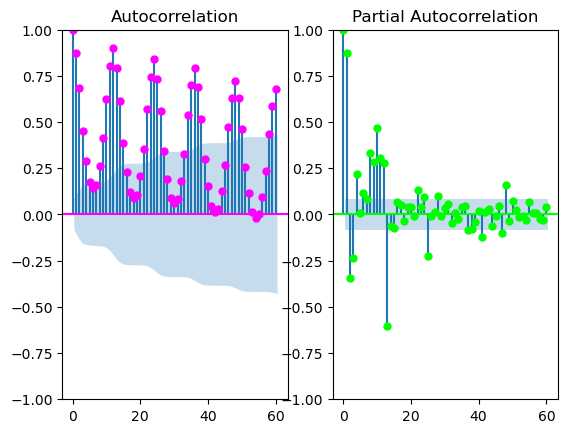

In [77]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df["y"],  lags=60, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

plot_pacf(df["y"],  lags=60, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

plt.show();

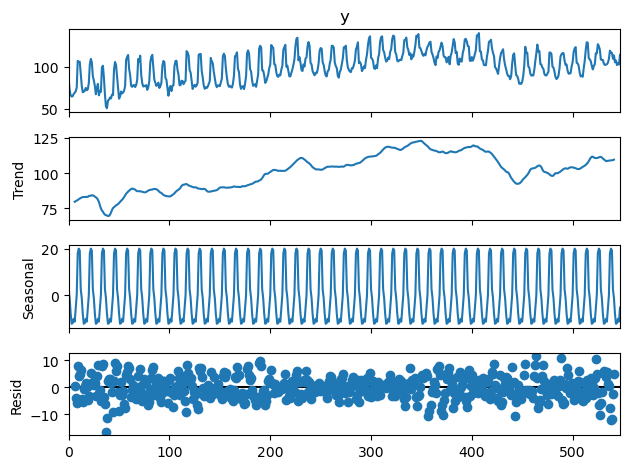

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose 
a = seasonal_decompose(df["y"], model = "add", period=12)
a.plot();

In [79]:
Y_train_df = df[df.ds<='2016-08-01'] 
Y_test_df = df[df.ds>'2016-08-01']

In [80]:
Y_train_df.shape, Y_test_df.shape

((536, 3), (12, 3))

C:\Users\maxag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maxag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maxag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maxag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

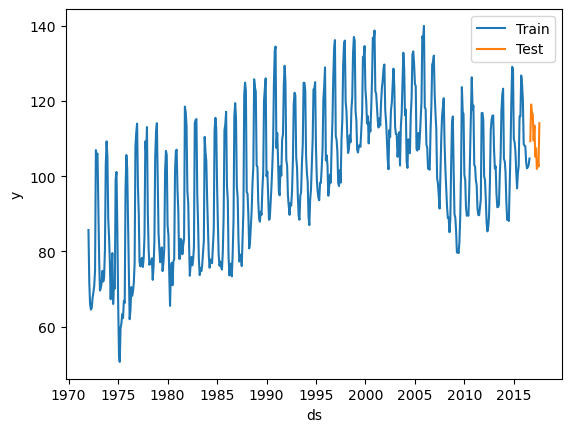

In [81]:
sns.lineplot(Y_train_df,x="ds", y="y", label="Train")
sns.lineplot(Y_test_df, x="ds", y="y", label="Test")
plt.show()

In [46]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.arima import arima_string

In [82]:
season_length = 12 # Monthly data 
horizon = len(Y_test_df) # number of predictions

models = [AutoARIMA(season_length=season_length)]

In [83]:
sf = StatsForecast(models=models, freq='MS')

In [84]:
sf.fit(df=Y_train_df)

StatsForecast(models=[AutoARIMA])

In [52]:
arima_string(sf.fitted_[0,0].model_)

'ARIMA(2,0,1)(0,1,0)[12]                   '

In [86]:
result=sf.fitted_[0,0].model_
print(result.keys())
print(result['arma'])


dict_keys(['coef', 'sigma2', 'var_coef', 'mask', 'loglik', 'aic', 'arma', 'residuals', 'code', 'n_cond', 'nobs', 'model', 'bic', 'aicc', 'ic', 'xreg', 'x', 'lambda'])
(1, 0, 0, 2, 12, 0, 1)


In [87]:
residual=pd.DataFrame(result.get("residuals"), columns=["residual Model"])
residual

,residual Model
0,0.085694
1,0.071820
2,0.066023
3,0.064564
4,0.065010
...,...
531,3.008596
532,3.942651
533,1.258873
534,1.585062


C:\Users\maxag\AppData\Local\Temp\ipykernel_20332\312260686.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, ax=axs[0,1]);
C:\Users\maxag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


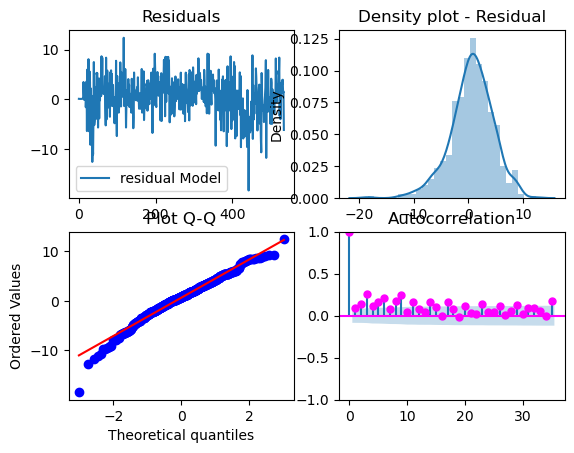

In [88]:
fig, axs = plt.subplots(nrows=2, ncols=2)

# plot[1,1]
residual.plot(ax=axs[0,0])
axs[0,0].set_title("Residuals");

# plot
sns.distplot(residual, ax=axs[0,1]);
axs[0,1].set_title("Density plot - Residual");

# plot
stats.probplot(residual["residual Model"], dist="norm", plot=axs[1,0])
axs[1,0].set_title('Plot Q-Q')

# plot
plot_acf(residual,  lags=35, ax=axs[1,1],color="fuchsia")
axs[1,1].set_title("Autocorrelation");

plt.show();


In [89]:
Y_hat_df = sf.forecast(df=Y_train_df, h=horizon, fitted=True)
Y_hat_df.head()


C:\Users\maxag\anaconda3\Lib\site-packages\statsforecast\core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoARIMA
unique_id,,
1,2016-09-01,109.955437
1,2016-10-01,121.920509
1,2016-11-01,122.458389
1,2016-12-01,120.562027
1,2017-01-01,106.864670


In [90]:
values=sf.forecast_fitted_values()
values

C:\Users\maxag\anaconda3\Lib\site-packages\statsforecast\core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,y,AutoARIMA
unique_id,,,
1,1972-01-01,85.694504,85.608803
1,1972-02-01,71.820000,71.748177
1,1972-03-01,66.022903,65.956879
1,1972-04-01,64.564499,64.499939
1,1972-05-01,65.010002,64.944992
...,...,...,...
1,2016-04-01,103.617897,100.609306
1,2016-05-01,102.081596,98.138947
1,2016-06-01,102.404404,101.145523


In [91]:
sf.forecast(df=Y_train_df, h=12, level=[95])


C:\Users\maxag\anaconda3\Lib\site-packages\statsforecast\core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-hi-95
unique_id,,,,
1,2016-09-01,109.955437,102.123718,117.787163
1,2016-10-01,121.920509,112.389771,131.451248
1,2016-11-01,122.458389,112.210350,132.706436
1,2016-12-01,120.562027,109.986313,131.137741
1,2017-01-01,106.864670,96.134926,117.594414
1,2017-02-01,105.721741,94.918701,116.524780
1,2017-03-01,103.670792,92.832672,114.508904
1,2017-04-01,98.512344,87.657394,109.367287
1,2017-05-01,96.068993,85.205963,106.932022


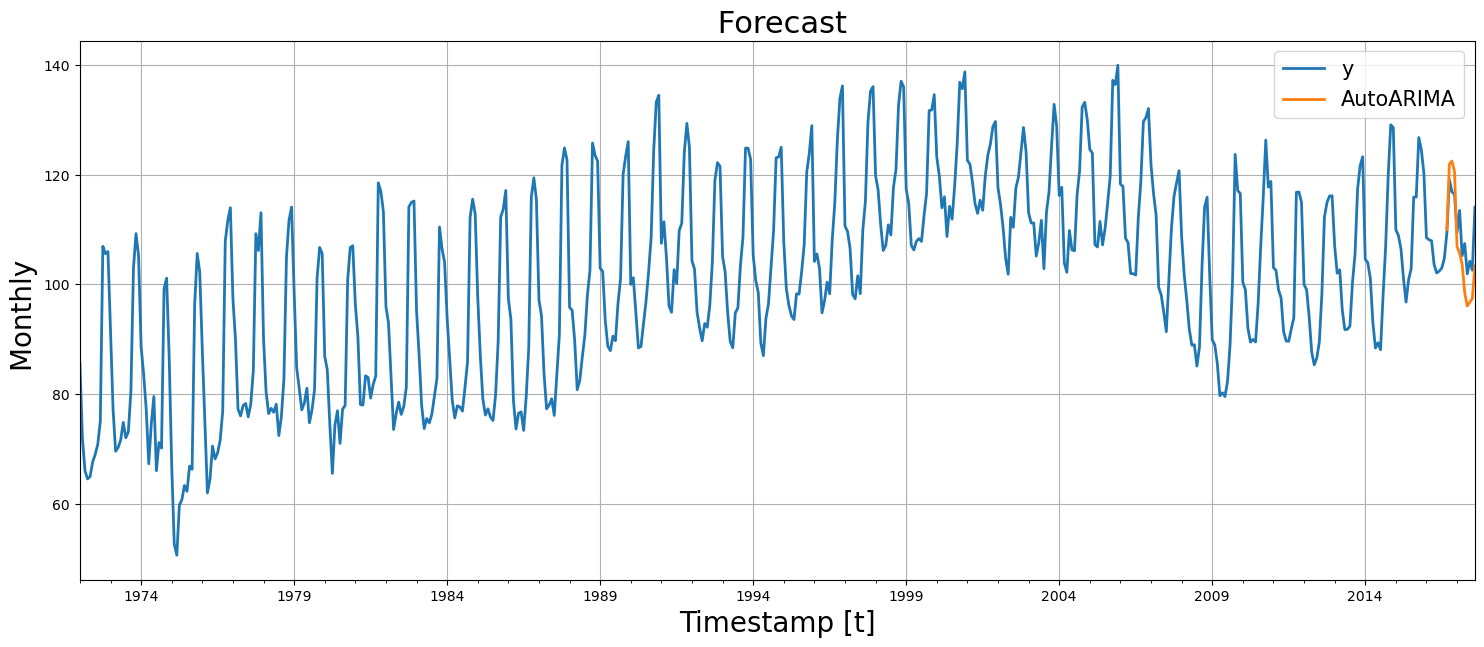

In [92]:
Y_hat_df = Y_test_df.merge(Y_hat_df, how='left', on=['unique_id', 'ds'])

fig, ax = plt.subplots(1, 1, figsize = (18, 7))
plot_df = pd.concat([Y_train_df, Y_hat_df]).set_index('ds')
plot_df[['y', 'AutoARIMA']].plot(ax=ax, linewidth=2)
ax.set_title(' Forecast', fontsize=22)
ax.set_ylabel('Monthly ', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()


In [93]:
sf.predict(h=12)


C:\Users\maxag\anaconda3\Lib\site-packages\statsforecast\core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoARIMA
unique_id,,
1,2016-09-01,109.955437
1,2016-10-01,121.920509
1,2016-11-01,122.458389
1,2016-12-01,120.562027
1,2017-01-01,106.864670
1,2017-02-01,105.721741
1,2017-03-01,103.670792
1,2017-04-01,98.512344
1,2017-05-01,96.068993


In [94]:
forecast_df = sf.predict(h=12, level = [80, 95]) 
forecast_df


C:\Users\maxag\anaconda3\Lib\site-packages\statsforecast\core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-lo-80,AutoARIMA-hi-80,AutoARIMA-hi-95
unique_id,,,,,,
1,2016-09-01,109.955437,102.123718,104.834549,115.076324,117.787163
1,2016-10-01,121.920509,112.389771,115.688690,128.152328,131.451248
1,2016-11-01,122.458389,112.210350,115.757553,129.159225,132.706436
1,2016-12-01,120.562027,109.986313,113.646942,127.477112,131.137741
1,2017-01-01,106.864670,96.134926,99.848869,113.880478,117.594414
1,2017-02-01,105.721741,94.918701,98.658012,112.785469,116.524780
1,2017-03-01,103.670792,92.832672,96.584129,110.757454,114.508904
1,2017-04-01,98.512344,87.657394,91.414673,105.610008,109.367287
1,2017-05-01,96.068993,85.205963,88.966042,103.171944,106.932022


In [95]:
df_plot=pd.concat([df, forecast_df]).set_index('ds').tail(220)
df_plot


,y,unique_id,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-lo-80,AutoARIMA-hi-80,AutoARIMA-hi-95
ds,,,,,,,
2000-05-01,108.7202,1,NaN,NaN,NaN,NaN,NaN
2000-06-01,114.2071,1,NaN,NaN,NaN,NaN,NaN
2000-07-01,111.8737,1,NaN,NaN,NaN,NaN,NaN
2000-08-01,117.9027,1,NaN,NaN,NaN,NaN,NaN
2000-09-01,125.6499,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2017-04-01,NaN,NaN,98.512344,87.657394,91.414673,105.610008,109.367287
2017-05-01,NaN,NaN,96.068993,85.205963,88.966042,103.171944,106.932022
2017-06-01,NaN,NaN,96.751160,85.884247,89.645668,103.856659,107.618080


C:\Users\maxag\anaconda3\Lib\site-packages\statsforecast\core.py:1447: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


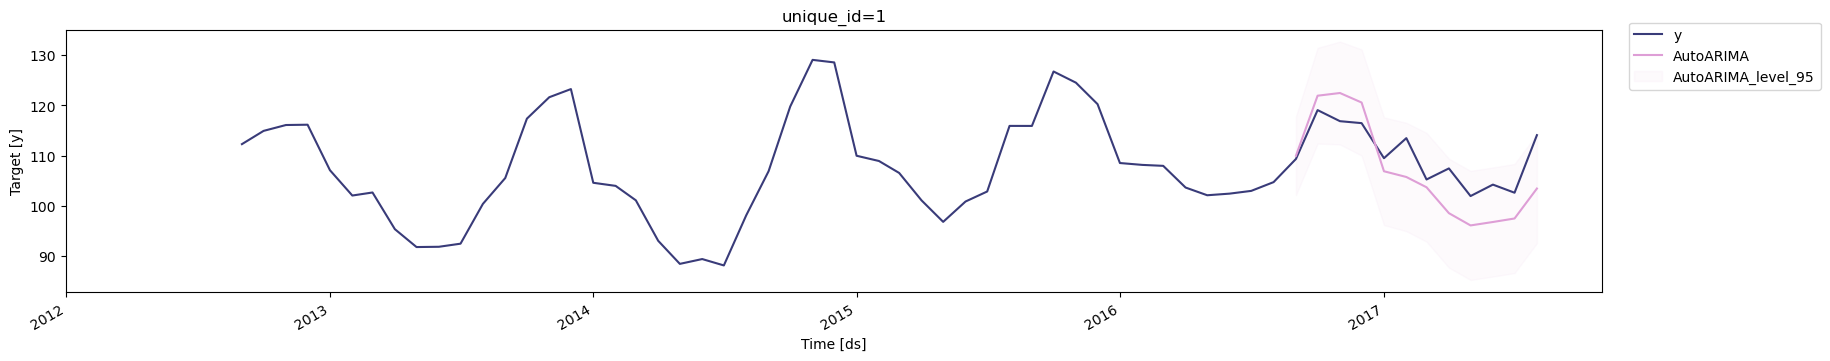

In [96]:
sf.plot(df, forecast_df, level=[95], max_insample_length=12 * 5)


In [97]:
from functools import partial

import utilsforecast.losses as ufl
from utilsforecast.evaluation import evaluate


In [98]:
evaluate(
    Y_test_df.merge(Y_hat_df),
    metrics=[ufl.mae, ufl.mape, partial(ufl.mase, seasonality=season_length), ufl.rmse, ufl.smape],
    train_df=Y_train_df,
)


,unique_id,metric,AutoARIMA
0,1,mae,5.260420
1,1,mape,0.047943
2,1,mase,1.015379
3,1,rmse,6.021264
4,1,smape,0.024578
